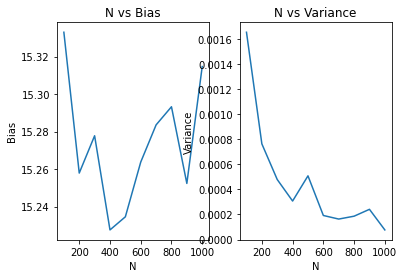

In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt

#final array
final=[]
# test array
test=[]

#bias array
Bias=[]
Resultant_Bias=[]
# variance array
variance=[]
Resultant_variance=[]

def testSet_Generation():
  for i in range(0,100):
        y = random.uniform(1,10)
        x = random.uniform(2,5)
        m=4+y+(3*x)
        test.append([y,x,m])
train=[]
# print(test)
def trainSet_Generation(numb):
  for i in range(100*numb):
    e=np.random.normal(0,0.25)
    y = random.uniform(1,10)
    x = random.uniform(2,5)
    m=4+y+(3*x)
    train.append([y,x,m+e])
def equation_Generation(train,numb):
  a=[]
  for j in range(100*numb):
    a.append([1,train[j][0],train[j][1]])    
  return a
def theta_Equation(eqs,train,numb):
  a=[]
  for j in range(100*numb):
    a.append(train[j][2])  
  qe=np.transpose(eqs)
  res = np.dot(qe,eqs)
  inv=np.linalg.inv(res)
  ser = np.dot(qe,a)
  theta = np.dot(inv,ser)
  return theta
#testSet generation 
testSet_Generation()
for inde_x in range(1,11):
  final.clear()
  for k in range(10):
    #trainSet generation
    trainSet_Generation(inde_x)
    #finding equation 
    eqs=equation_Generation(train,inde_x)
    # theta equation 
    theta=theta_Equation(eqs,train,inde_x)
    final.append(theta)
    train.clear()

  #etc array
  etc=[]
  for i in range(0,100):
    etc.append(test[i][2])


  #predictions
  for i in range(100):
    n=[]
    var=0
    for j in range(10):
      n.append(final[j][0]+final[j][1]*test[i][0]+final[j][2]*test[i][1])
    mean=np.mean(n)
    etc=np.mean(etc)
    bias=(etc-mean)**2
    for i in range(10):
      var+=(n[i]-mean)**2
    var=var/10
    Bias.append(bias)
    variance.append(var)
  Resultant_variance.append(np.mean(variance))
  Resultant_Bias.append(np.mean(Bias))
  Bias = []
  variance = []

#graph plotting 
def graphPlot(axis,Resultant_Bias,Resultant_variance):
    plt.subplot(1, 2, 1)
    plt.plot(axis,Resultant_Bias)
    plt.title("N vs bias")
    plt.xlabel("N")
    plt.ylabel("bias")
    plt.subplot(1, 2, 2)
    plt.plot(axis,Resultant_variance)
    plt.title("N vs variance")
    plt.xlabel("N")
    plt.ylabel("variance")
    plt.show()
axis=[100,200,300,400,500,600,700,800,900,1000]
graphPlot(axis,Resultant_Bias,Resultant_variance)
